In [66]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

# **Soal 1**

In [67]:
# Jalankan: fungsi plot
def plot_kotak(vertices):
    plt.figure(figsize=(4, 4))
    n = len(vertices)

    for i in range(n-1):
        plt.plot(vertices[i:i+2,0], vertices[i:i+2,1], c='b')
    plt.plot([vertices[-1,0], vertices[0,0]], 
             [vertices[-1,1], vertices[0,1]], 
             c='b')
    
    plt.scatter(vertices[:,0], vertices[:,1], c='r')
    
    plt.grid()
    plt.xticks(np.arange(0,13))
    plt.yticks(np.arange(0,13))
    plt.xlim([-.5, 12])
    plt.ylim([-.5, 12])
    plt.show()

**Input original vertices**

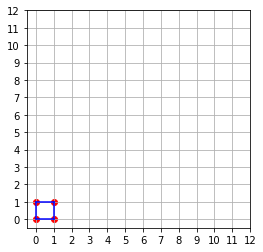

In [68]:
# Tulis
ori_vertices = np.array([[0, 0],
                        [1, 0],
                        [1, 1],
                        [0, 1]])

# Plot
plot_kotak(ori_vertices)

**Input matriks rotasi dan cari vertices baru**

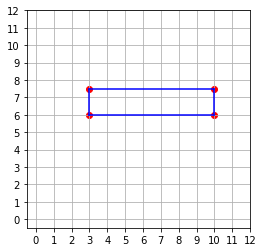

In [69]:
# Matriks transformasi
K = np.array([[7, 0], [0, 1.5]])
b = np.array([3, 6])

# Cari vertices baru
transformed_vertices = (K @ ori_vertices.T).T

X = transformed_vertices + np.array(b)

# for point in transformed_vertices:
#     point += b

# Plot
# plot_kotak(transformed_vertices)
plot_kotak(X)

# **Soal 2**

**Buat graph**

In [70]:
# Buat graph
A = np.array([[-1, -1, 0, 1, 0],
            [1, 0, -1, 0, 0],
            [0, 0, 1, -1, -1],
            [0, 1, 0, 0, 1]])

A

array([[-1, -1,  0,  1,  0],
       [ 1,  0, -1,  0,  0],
       [ 0,  0,  1, -1, -1],
       [ 0,  1,  0,  0,  1]])

**Cari input keran**

In [71]:
# Cari input keran
x = np.array([0.6, 0.3, 0.6, -0.1, -0.3])
A@x

array([-1.,  0.,  1.,  0.])

# **Soal 3**

**Input**

In [72]:
img = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9, 10, 11, 12],
                [13, 14, 15, 16]])

kernel = np.array([[1, 0, 0],
                   [0, 2, 0],
                   [0, 0, 3]])

In [73]:
# Restructured the image
norm_img = []
for i in range(len(img)):
    for j in range(len(img[0])):
        norm_img.append(img[i][j])

norm_img = np.array(norm_img)
norm_img

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [74]:
# Fungsi toeplitz matrix
def toeplitz(b, n):
    m = len(b)
    T = np.zeros((n*n, n))

    for i in range(3):
        for j in range(n):
            if j<2:
                T[i*n+j:i*n+m+j, j] = b[i].T
            else:
                addition = int(n/2)
                T[i*n+j+addition:i*n+m+j+addition, j] = b[i].T

    return T

In [75]:
Tb = toeplitz(kernel, len(img))
Tb.T

array([[1., 0., 0., 0., 0., 2., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 2., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 2., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 2., 0., 0., 0., 0., 3.]])

In [76]:
raw_final_img = Tb.T @ norm_img
raw_final_img

array([46., 52., 70., 76.])

**Cari output**

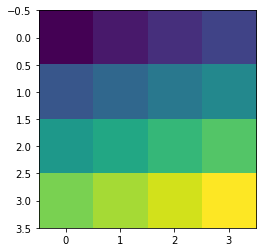

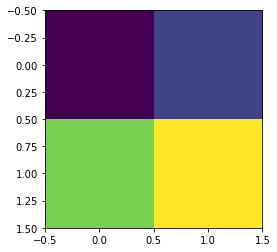

In [77]:
# Cari output
fin_img = []

length = int(np.sqrt(len(raw_final_img)))
for i in range(length):
    arr = []
    for j in range(length):
        arr.append(raw_final_img[i*(i+1) + j])

    fin_img.append(arr)

fin_img = np.array(final_img)

# plot
plt.imshow(img)
plt.show()

plt.imshow(fin_img)
plt.show()

# **Soal 4**

**Load Data**

         Date       Open       High        Low      Close  Adj Close   Volume
0  2020-01-06  24.600000  24.690001  24.410000  24.629999  23.861149  3567678
1  2020-01-07  24.799999  25.030001  24.770000  24.950001  24.171162  4023426
2  2020-01-08  24.950001  25.000000  24.570000  24.860001  24.083971  4999690
3  2020-01-09  25.000000  25.129999  24.830000  24.889999  24.113033  6149710
4  2020-01-10  25.090000  25.170000  25.000000  25.120001  24.335855  3465876
5  2020-01-13  25.040001  25.120001  24.879999  25.010000  24.229288  2820451
6  2020-01-14  25.120001  25.230000  25.080000  25.200001  24.413359  4063238
7  2020-01-15  25.209999  25.290001  25.180000  25.250000  24.461798  4679739
8  2020-01-16  25.400000  25.469999  25.290001  25.420000  24.626490  4803331
9  2020-01-17  25.590000  25.674999  25.420000  25.420000  24.626490  4711623


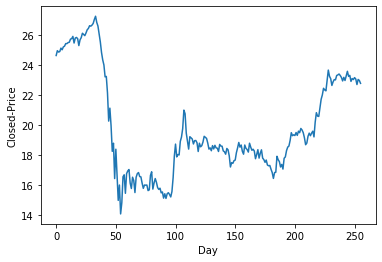

Panjang data = 256


In [78]:
# Open data
df = pd.read_csv('dataset/ANZ.AX.csv')
print(df.head(10))

plt.plot(df['Close'])
plt.xlabel('Day')
plt.ylabel('Closed-Price')
plt.show()
print('Panjang data =', len(df))

In [79]:
def plot_sma(df, sma, n_period):
    plt.plot([i+n_period for i in range(len(sma))], sma)
    plt.plot(df['Close'])
    plt.xlabel('Day')
    plt.ylabel('Closed-Price')
    plt.show()

In [80]:
# fungsi toeplitz
def toeplitz(n_period, n_data):
    T = np.zeros((n_data-n_period+1, n_data))
    for j in range(n_data-n_period+1):
        T[j,j:j+n_period] = [1 for i in range(n_period)]
    return T

In [81]:
n_period = 5
n_data = len(df)

Tb = toeplitz(n_period, n_data)/n_period
Tb

array([[0.2, 0.2, 0.2, ..., 0. , 0. , 0. ],
       [0. , 0.2, 0.2, ..., 0. , 0. , 0. ],
       [0. , 0. , 0.2, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0.2, 0.2, 0. ],
       [0. , 0. , 0. , ..., 0.2, 0.2, 0.2]])

In [82]:
SMA = Tb @ df['Close']

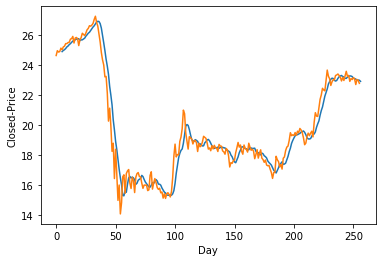

In [83]:
plot_sma(df, SMA, n_period)

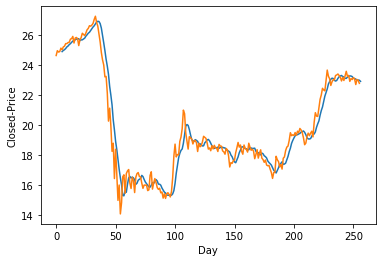

In [84]:
n_period_short = 5
n_data = len(df)

Tb_short = toeplitz(n_period_short, n_data)/n_period_short
SMA_short = Tb_short @ df['Close']
plot_sma(df, SMA_short, n_period_short)

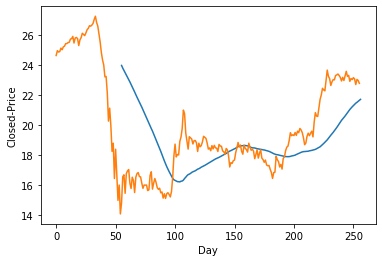

In [85]:
n_period_long = 55
n_data = len(df)

Tb_long = toeplitz(n_period_long, n_data)/n_period_long
SMA_long = Tb_long @ df['Close']
plot_sma(df, SMA_long, n_period_long)

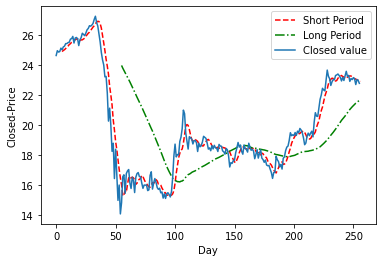

In [86]:
plt.plot([i+n_period_short for i in range(len(SMA_short))], SMA_short, '--r', label='Short Period')
plt.plot([i+n_period_long for i in range(len(SMA_long))], SMA_long, '-.g', label='Long Period')
plt.plot(df['Close'], label='Closed value')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Closed-Price')
plt.show()